<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_4X/blob/main/GQtest_cluster_groupwise_(y_hat)_0_1_0_9_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_4X/groupwise_0.1_0.9'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.1_0.9_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,20.576637,76.024232,67.066480,88.282887,-0.158879,261.791357,262.934414,-1.143057
1,0.0,1.0,45.152384,88.892153,91.133863,69.290395,0.065212,304.534008,304.490538,0.043469
2,0.0,2.0,31.417271,44.273060,69.867181,95.829555,0.720275,252.107342,252.101620,0.005722
3,0.0,3.0,68.258350,76.459160,40.799554,60.942273,-0.108470,256.350866,256.726288,-0.375421
4,0.0,4.0,68.308275,94.550857,90.148574,37.775008,-0.029944,300.752769,300.102554,0.650215
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.200909,63.936296,56.043692,69.980640,-0.641664,222.519873,223.114952,-0.595079
19996,999.0,16.0,76.580215,55.732009,38.253253,68.498213,0.006189,249.069879,248.744179,0.325700
19997,999.0,17.0,32.433411,64.334236,93.152689,69.568100,0.460708,269.949144,269.389585,0.559559
19998,999.0,18.0,70.288278,56.288806,26.627096,43.231983,-0.997448,205.438715,206.281792,-0.843077


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    20.576637  76.024232  67.066480  88.282887 -0.158879  261.791357   
      1.0    45.152384  88.892153  91.133863  69.290395  0.065212  304.534008   
      2.0    31.417271  44.273060  69.867181  95.829555  0.720275  252.107342   
      3.0    68.258350  76.459160  40.799554  60.942273 -0.108470  256.350866   
      4.0    68.308275  94.550857  90.148574  37.775008 -0.029944  300.752769   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   23.200909  63.936296  56.043692  69.980640 -0.641664  222.519873   
      16.0   76.580215  55.732009  38.253253  68.498213  0.006189  249.069879   
      17.0   32.433411  64.334236  93.152689  69.568100  0.460708  269.949144   
      18.0   70.288278  56.288806  26.627096  43.231983 -0.997448  205.438715   
      19.0   27.627257  24.130116  44.941665  59.194333 -0.650827  165.242544   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    262.934414 -1.143057  
      1.0    304.490538  0.043469  
      2.0    252.101620  0.005722  
      3.0    256.726288 -0.375421  
      4.0    300.102554  0.650215  
...                 ...       ...  
999.0 15.0   223.114952 -0.595079  
      16.0   248.744179  0.325700  
      17.0   269.389585  0.559559  
      18.0   206.281792 -0.843077  
      19.0   165.799979 -0.557435  

[20000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    20.576637  76.024232  67.066480  88.282887 -0.158879  261.791357   
      1.0    45.152384  88.892153  91.133863  69.290395  0.065212  304.534008   
      2.0    31.417271  44.273060  69.867181  95.829555  0.720275  252.107342   
      3.0    68.258350  76.459160  40.799554  60.942273 -0.108470  256.350866   
      4.0    68.308275  94.550857  90.148574  37.775008 -0.029944  300.752769   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   23.200909  63.936296  56.043692  69.980640 -0.641664  222.519873   
      16.0   76.580215  55.732009  38.253253  68.498213  0.006189  249.069879   
      17.0   32.433411  64.334236  93.152689  69.568100  0.460708  269.949144   
      18.0   70.288278  56.288806  26.627096  43.231983 -0.997448  205.438715   
      19.0   27.627257  24.130116  44.941665  59.194333 -0.650827  165.242544   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    262.934414 -1.143057  
      1.0    304.490538  0.043469  
      2.0    252.101620  0.005722  
      3.0    256.726288 -0.375421  
      4.0    300.102554  0.650215  
...                 ...       ...  
999.0 15.0   223.114952 -0.595079  
      16.0   248.744179  0.325700  
      17.0   269.389585  0.559559  
      18.0   206.281792 -0.843077  
      19.0   165.799979 -0.557435  

[20000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,20.576637,76.024232,67.066480,88.282887,-0.158879,261.791357,262.934414,-1.143057
1,0.0,1.0,45.152384,88.892153,91.133863,69.290395,0.065212,304.534008,304.490538,0.043469
2,0.0,2.0,31.417271,44.273060,69.867181,95.829555,0.720275,252.107342,252.101620,0.005722
3,0.0,3.0,68.258350,76.459160,40.799554,60.942273,-0.108470,256.350866,256.726288,-0.375421
4,0.0,4.0,68.308275,94.550857,90.148574,37.775008,-0.029944,300.752769,300.102554,0.650215
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.200909,63.936296,56.043692,69.980640,-0.641664,222.519873,223.114952,-0.595079
19996,999.0,16.0,76.580215,55.732009,38.253253,68.498213,0.006189,249.069879,248.744179,0.325700
19997,999.0,17.0,32.433411,64.334236,93.152689,69.568100,0.460708,269.949144,269.389585,0.559559
19998,999.0,18.0,70.288278,56.288806,26.627096,43.231983,-0.997448,205.438715,206.281792,-0.843077


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    20.576637  76.024232  67.066480  88.282887 -0.158879  261.791357   
      1.0    45.152384  88.892153  91.133863  69.290395  0.065212  304.534008   
      2.0    31.417271  44.273060  69.867181  95.829555  0.720275  252.107342   
      3.0    68.258350  76.459160  40.799554  60.942273 -0.108470  256.350866   
      4.0    68.308275  94.550857  90.148574  37.775008 -0.029944  300.752769   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   23.200909  63.936296  56.043692  69.980640 -0.641664  222.519873   
      16.0   76.580215  55.732009  38.253253  68.498213  0.006189  249.069879   
      17.0   32.433411  64.334236  93.152689  69.568100  0.460708  269.949144   
      18.0   70.288278  56.288806  26.627096  43.231983 -0.997448  205.438715   
      19.0   27.627257  24.130116  44.941665  59.194333 -0.650827  165.242544   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    262.934414 -1.143057  
      1.0    304.490538  0.043469  
      2.0    252.101620  0.005722  
      3.0    256.726288 -0.375421  
      4.0    300.102554  0.650215  
...                 ...       ...  
999.0 15.0   223.114952 -0.595079  
      16.0   248.744179  0.325700  
      17.0   269.389585  0.559559  
      18.0   206.281792 -0.843077  
      19.0   165.799979 -0.557435  

[20000 rows x 8 columns]

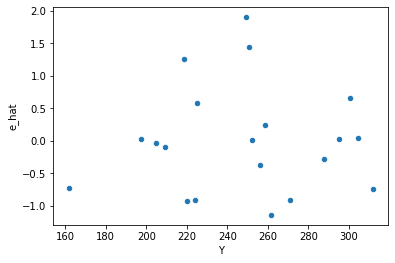

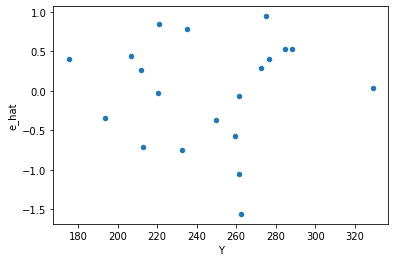

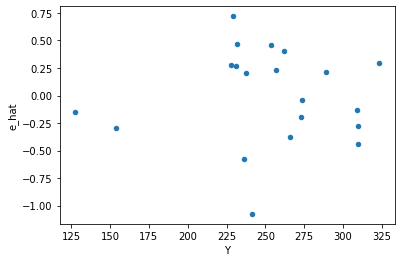

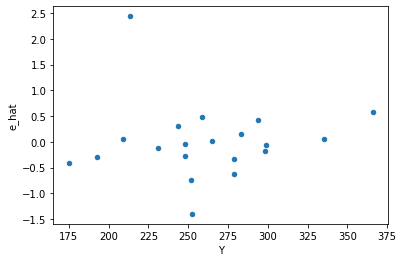

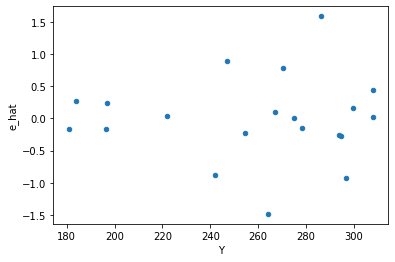

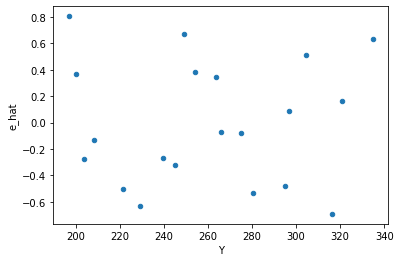

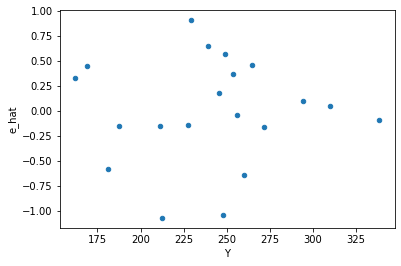

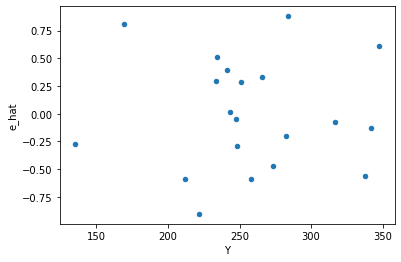

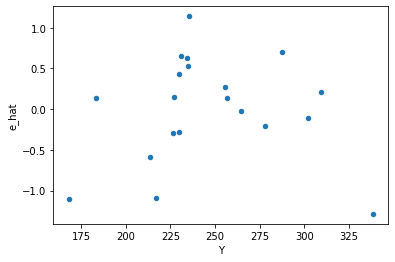

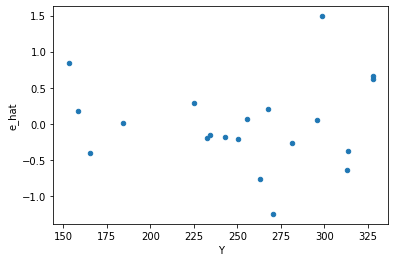

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew1.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew2.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew3.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew4.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew5.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew6.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew7.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew8.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew9.plot(x ='Y', y='e_hat', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,5.0,7.0,2.506862779017851,4.498826073829864,0.5013725558035702,0.642689439118552,1.2818600293916915,0.736825853675654,0.631587073162173,0.368412926837827,Reject001=1 : Homoscedasticity
2.0,7.0,5.0,0.3843738362298842,1.6089656085009767,0.0549105480328406,0.32179312170019536,5.860315244126485,0.06916308412566607,0.965418457937167,0.03458154206283304,Reject001=1 : Homoscedasticity
3.0,4.0,8.0,0.546903588696155,8.653421555854804,0.13672589717403874,1.0816776944818505,7.911286134074368,0.013903948349809125,0.9930480258250954,0.006951974174904563,Reject001=1 : Homoscedasticity
7.0,2.0,10.0,0.07446445444839615,2.299678176485138,0.037232227224198076,0.22996781764851382,6.176579667494414,0.03583731191110018,0.9820813440444499,0.01791865595555009,Reject001=1 : Homoscedasticity
11.0,3.0,9.0,0.4863062063988635,4.2863503993904954,0.16210206879962116,0.4762611554878328,2.938032555750737,0.18313800303260774,0.9084309984836961,0.09156900151630387,Reject001=1 : Homoscedasticity
12.0,6.0,6.0,0.29153805224029095,1.8505398038242806,0.048589675373381824,0.3084233006373801,6.347506919264975,0.04068775084510312,0.9796561245774484,0.02034387542255156,Reject001=1 : Homoscedasticity
13.0,3.0,9.0,0.2965501624851408,1.9371604905981434,0.09885005416171361,0.21524005451090483,2.1774399249066994,0.3209112525685689,0.8395443737157156,0.16045562628428445,Reject001=1 : Homoscedasticity
16.0,5.0,7.0,0.8924077431827151,5.761793413835303,0.17848154863654303,0.8231133448336146,4.6117559552880705,0.07016329074678063,0.9649183546266097,0.03508164537339031,Reject001=1 : Homoscedasticity
17.0,7.0,5.0,1.244561910694375,1.633771601798105,0.17779455867062502,0.326754320359621,1.837819575597658,0.521035864614334,0.739482067692833,0.260517932307167,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,4.0,7.553141848330591,2.4592167076249813,0.9441427310413238,0.6148041769062453,0.6511771543569043,0.5605167895177862,Reject001=1 : Homoscedasticity
1.0,5.0,7.0,2.506862779017851,4.498826073829864,0.5013725558035702,0.642689439118552,1.2818600293916915,0.736825853675654,Reject001=1 : Homoscedasticity
2.0,7.0,5.0,0.3843738362298842,1.6089656085009767,0.0549105480328406,0.32179312170019536,5.860315244126485,0.06916308412566607,Reject001=1 : Homoscedasticity
3.0,4.0,8.0,0.546903588696155,8.653421555854804,0.13672589717403874,1.0816776944818505,7.911286134074368,0.013903948349809125,Reject001=1 : Homoscedasticity
4.0,11.0,1.0,8.159294463053211,2.5316250388097546e-24,0.7417540420957465,2.5316250388097546e-24,3.413024931629519e-24,2.1495306981796275e-124,Reject001=0 : Heteroscedasticity
5.0,6.0,6.0,1.951173205328295,0.934399429853926,0.32519553422138253,0.15573323830898766,0.47889107297202166,0.3919666469484784,Reject001=1 : Homoscedasticity
6.0,4.0,8.0,1.534100086026455,2.17762610567766,0.3835250215066138,0.2722032632097075,0.7097405591437101,0.7846457545230396,Reject001=1 : Homoscedasticity
7.0,2.0,10.0,0.07446445444839615,2.299678176485138,0.037232227224198076,0.22996781764851382,6.176579667494414,0.03583731191110018,Reject001=1 : Homoscedasticity
8.0,10.0,2.0,3.9607214014211154,0.837307856422131,0.39607214014211156,0.4186539282110655,1.0570143309268143,0.8408784606710678,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      772
Reject001=0 : Heteroscedasticity    228
Name: Result_test, dtype: int64